## Finals Problem Set 1
Digital Signal Processing

In [1]:
# necessary imports
import numpy as np
import scipy as sci
import sympy as sp
import matplotlib.pyplot as plt

#### Part 1

This section tests parameters for the signal power function of each given item.

In [2]:
# part 1 codes

# functions for defining discrete and continuous
# Entergy per unit and Power per unit
def compute_continuous_energy_power(signal, variable, limits):
    energy = sp.integrate(sp.Abs(signal)**2, limits)
    power = sp.limit(1/(limits[1]-limits[0]) * sp.integrate(sp.Abs(signal)**2, (variable, limits[0], limits[1])), variable, sp.oo)
    return energy, power

def compute_discrete_energy_power(signal, variable):
    energy = sp.summation(sp.Abs(signal)**2, (variable, -sp.oo, sp.oo))
    power = sp.limit(1/(2*sp.oo + 1) * sp.summation(sp.Abs(signal)**2, (variable, -sp.oo, sp.oo)), variable, sp.oo)
    return energy, power

# Variables
t = sp.symbols('t', real=True)
n = sp.symbols('n', integer=True)
w = sp.symbols('w', real=True)
signal_a = sp.sin(n)
signal_b = sp.cos(t)
signal_c_real = 2 * sp.cos(t)
signal_c_imag = 2 * sp.sin(t)
signal_d = (2 / sp.sqrt(np.pi)) * sp.exp(-1j * n)

# Setting limits for signals
t_limits = (t, -sp.pi, sp.pi)
T = np.pi
test_range = np.linspace(-T, T, 1000)

# Computation of energy and power
energy_a, power_a = compute_discrete_energy_power(signal_a.subs(n, test_range), n)
energy_b, power_b = compute_continuous_energy_power(signal_b.subs(t, test_range), t, t_limits)
energy_c_real, power_c_real = compute_continuous_energy_power(signal_c_real.subs(t, test_range), t, t_limits)
energy_c_imag, power_c_imag = compute_continuous_energy_power(signal_c_imag.subs(t, test_range), t, t_limits)
energy_d, power_d = compute_discrete_energy_power(signal_d.subs(n, test_range), n)

print("a.")
print("\tEnergy = ", energy_a)
print("\tPower = ", power_a)

print("b.")
print("\tEnergy = ", energy_b)
print("\tPower = ", power_b)

print("c.")
print("\tEnergy = ", energy_c_real + energy_c_imag)
print("\tPower = ", power_c_real + power_c_imag)

print("d.")
print("\tEnergy = ", energy_d)
print("\tPower = ", power_d)

a.
	Energy =  Sum(sin(n)**2, (n, -oo, oo))
	Power =  0
b.
	Energy =  pi
	Power =  1/2
c.
	Energy =  8*pi
	Power =  4
d.
	Energy =  oo
	Power =  nan


#### Part 2

This section provides proof of the equality of the trigonometric function
$
sin^2(\theta) = \frac{1}{2}(1-cos(2\theta))
$
 using Python.

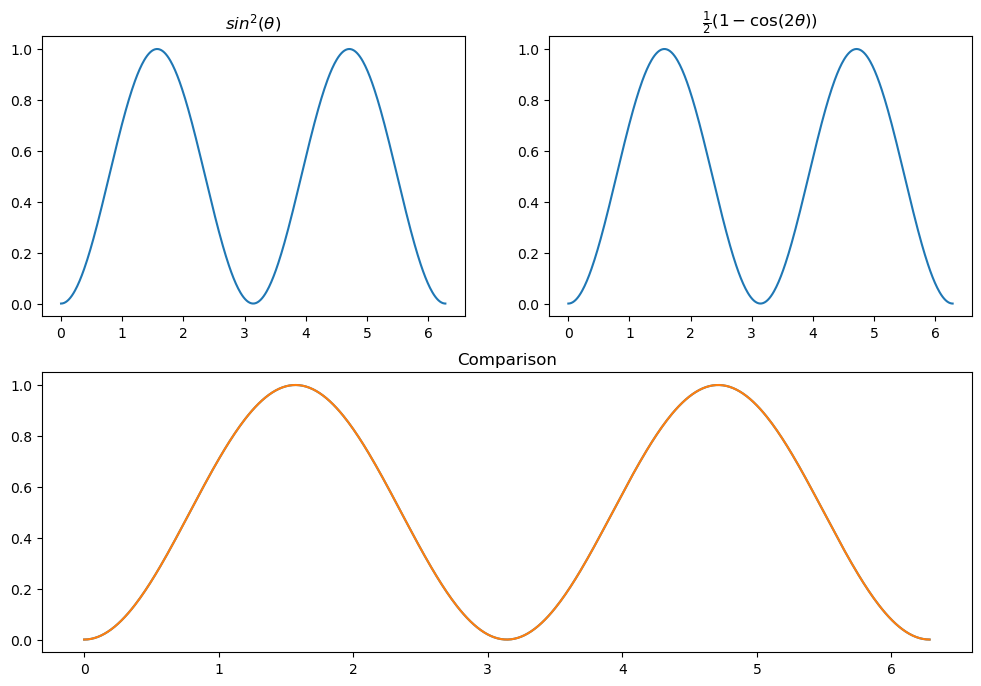

In [3]:
# part 2 codes
interval = 500

plt.figure(figsize=(12,8))

# Left hand side
def lh_func(param):
    return np.sin(param)**2 
# lh_side = lh_func(theta)
lh_interval = np.linspace(0, 2*np.pi, interval)
lh_values = lh_func(lh_interval)
# Plot 1
plt.subplot(221)
plt.plot(lh_interval, lh_values)
plt.title(r'$sin^2(\theta)$')

# Ride hand side
def rh_func(param):
    return (0.5)*(1 - np.cos(2*param))
# rh_side = rh_func(theta)
rh_interval = np.linspace(0, 2*np.pi, interval)
rh_values = rh_func(rh_interval)
# Plot 2
plt.subplot(222)
plt.plot(rh_interval, rh_values)
plt.title(r'$\frac{1}{2}(1 - \cos(2\theta))$')

# Plot 3
plt.subplot(212)
plt.plot(rh_interval, rh_values, lh_interval, lh_values)
plt.title('Comparison')

plt.show()

#### Part 3
This section provides proof of the equality of the trigonometric function
$
e^{i\pi}+1 = 0
$
 using Phython.

In [4]:
# Left hand side
def e_ident(param):
    return np.e**(1j*param) +1
lh_values = e_ident(np.pi)
# Ride hand side
def rh_func(param):
    return np.cos(param) + 1j*np.sin(param)
rh_values = rh_func(np.pi)

print(r'Value of e^(i\pi)+1: ', lh_values.real)
print(r'Value of cos⁡(\pi)+isin(\pi): ', lh_values.real)
print('')


Value of e^(i\pi)+1:  0.0
Value of cos⁡(\pi)+isin(\pi):  0.0

